<a href="https://colab.research.google.com/github/adap7/IRTM/blob/main/Copy_of_IRTM_Tutorial_intro_2024_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start by copying this into your Google Drive!!

# Information Retrieval & Text Mining
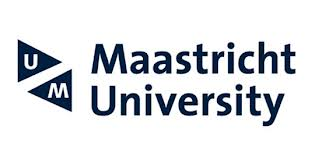
## Notebook 1

Version 2024-2025


Adapted and updated from [here](https://github.com/castorini/anserini-notebooks-afirm2020)

# Quick Introduction to Google Colaboratory

The Google Colaboratory (commmonly abbreviated as Google Colab) is a development environment that runs in the browser using Google Cloud.

The [official notebooks](https://colab.research.google.com/notebooks/) provided by Google Colab are a good place to start learning about the functionalities.

## Notebooks

A notebook represents the source file in Colab.
It is essentially a web application that contains live code, equations, visualizations or text.
The Colab kernel officially supports Python and Swift.
Kernels can also be installed for other languages such as Scala or R.

A Colab notebook constitutes two types of `cells`: `run` and `markdown`.
A run cell is an executable unit that expresses the action to be carried out.

You may run a cell either by clicking the button on the far left of the cell or with `SHIFT + Enter`.
The button on the left also signifies whether a cell is currently running, or if it has finished, its running order.

Here is a Python cell that outputs `Hello world!`:

In [1]:
print('Hello world!')

Hello world!


### Exercise #1
Change `world` in the above line with your name and re-run the cell.

In [2]:
print('Hello Ada!')

Hello Ada!


## Shell

Check out this [interactive tutorial](https://www.learnshell.org/) to brush up on shell scripting.

Shell scripts/commands can also be executed in a cell.
However, unlike Python code, each line has to be prepended with an exclamation mark, `!`, so that the notebook recognizes the Shell command.

For example, let's check our working directory:

In [3]:
!pwd
!ls

/content
sample_data


As you can see, we are currently in `/content`, which only contains the `sample_data` directory.
To confirm this in the user interface, click on the bottom file icon in the leftmost panel of your browser, and look at the current status of your filesystem.

###Exercise #2
Create a file called `your_name.txt` that contains your name with `echo`.
Make sure to change the filename as you need a unique identifier to create a file in the bucket.
Confirm the creation of the file in your environment.

In [12]:
from os import write
# !echo "Ada.txt"
# Where is the file?
myFile = open("Ada.txt", 'w')
# myFile.write('Ada text file')
myFile.close()
!echo Ada.txt

Ada.txt


## Magics

Notebooks define a set of system commands called `magics`.
Line magics are prepended with a single `%` character and only affect the line that they are on.
More commonly, cell magics are expressed with `%%` and govern the whole cell that they precede.

A cell magic that is used often in the following notebooks is `%%capture`, which suppresses the output of the respective cell.
It is especially useful when running a cell with verbose logging, e.g., downloading or processing many files.

Some of the other magics include:
- `%timeit`: automatically determines the execution time of a single-line Python statement
- `%%html`: treats the entire cell as an HTML block
- `%%bash`: treats the entire cell as a Bash script

For others, check out the [Jupyter documentation](https://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb).

### Exercise #3
Suppress the output of the `Hello World` Python example with `%%capture`.

In [14]:
%%capture
print("Hello World!")

## Data

Colab keeps a temporary storage space for data and other intermediate files.
However, it is also possible to persist external data stored on your local file system, Google Drive or Google Cloud Storage (GCS).
To learn more about different storage options, please visit [this webpage](https://colab.research.google.com/notebooks/io.ipynb).

For these tutorials, we will work with Google Drive for storage. Let's first mount Google Drive to Colab. We do this by running the following. We see a popup with the title: "Permit this notebook to access your Google Drive files?". You should click on "Connect to Google Drive". Then click on your Google Account, fill in your password if needed, and click "Allow".

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We can display what's in our Drive by listing the path '/content/drive/MyDrive/'

In [16]:
!ls /content/drive/MyDrive/

'02. Learn Italian author Paul Noble.pdf'
'03. Italian Language Kit author Cactus Language.pdf'
'04. Italian Foundations (Article) author Italy Made Easy.pdf'
 04-ReportDraft-Project2-2.gdoc
 05-Agenda-2021-11-04.gdoc
 05-Agenda-2021-11-04.pdf
 05-Agenda-2022-01-14.gdoc
'05. A grammar of the Italian Language author Pietro Bachi.pdf'
' 05-Draft article.gdoc'
' 05-introductionPhase1.gdoc'
 05-Minutes-2022-01-07.gdoc
'06. Very basic Grammar of Italian author DeepThought.pdf'
 07-Agenda-2021-03-17.gdoc
 07-Agenda-2021-05-18.gdoc
 07-FinalReport.gdoc
 07-Minutes-2021-03-15.gdoc
 07-Minutes-2021-06-11.gdoc
'07. Overall Grammar author Università di Bologna & Politecnico di Milano.pdf'
 07-OverviewPhase2.gdoc
'08. MFLE Italian Reference Grammar author Education Scotland.pdf'
 108-Simulation-Modeling-and-Analysis-Averill-M.-Law-Edisi-5-2014.pdf
'10. Direct Object Pronouns (Article) author Italy Made Easy.pdf'
'11. Indirect Object Pronouns (Article) author Italy Made Easy.pdf'
 12-Week-Goals-Te

Colab notebooks are automatically saved in a folder named `Colab Notebooks` in your Google Drive.
You may also trigger this action at any time with the keyboard shortcut `CTRL+S`.
It is also possible to save a copy of your notebook to a Github repo through the Colab interface: `File -> Save a copy in Github...`

### Exercise #4
1. Make a folder for this course on your drive using a shell command.
2. Copy the file `your_name.txt` that you created earlier to that folder with a shell command.

In [19]:
!mkdir -p irtm
!cp Ada.txt irtm/

### Restarting the Shell

Sometimes you may want to revert an unintended side-effect or simply start from scratch.
In this case, you may reset the Python shell through: `Runtime -> Restart runtime...`.
To reset the Colab image completely, do `Runtime -> Restart all runtimes...`.

### Using GPUs

Colab gives access to a GPU
Unfortunately, it is common for your session to time out after ~12 hours.
For this reason, a good practice is to save your checkpoints to Google Drive so that you can resume your training easily.

You may enable the GPU runtime through `Runtime -> Change runtime type -> Hardware accelerator -> GPU`.
We will need the GPU runtime for the final activity, and learn how to enable it programmatically.

# Text Processing with Python

[Python]() is an interpreted, high level programming language:

- **Strongly typed:** types are enforced
- **Dynamically implicitly typed:** you don't have to explicitly specify the type of a variable (unlike languages like Java or C)
- **Case sensitive:** `afirm` and `AFIRM` represent different variables
- **Object-oriented:** everything is an object!

Now we will go through basic a few basic steps of text processing to introduce Python, and finish this notebook with a TF-IDF exercise.
As you will see, the Python syntax is quite clean and intuitive, which makes it the ideal choice for data manipulation.


For the purposes of this activity, let's take a sample query and passage pair from the [MS MARCO passage ranking collection](https://microsoft.github.io/msmarco/):

In [20]:
query = 'Why did the US make the atomic bomb?'
passage = '''
The presence of communication amid scientific minds was equally important \
to the success of the Manhattan Project as scientific intellect was. The \
only cloud hanging over the impressive achievement of the atomic researchers \
and engineers is what their success truly meant; hundreds of thousands of \
innocent lives obliterated.
'''

Comments start with the hash sign, `#`, and are ignored during interpretation.

A string in Python are enclosed in single or double quotes.
On the other hand, a multiline string has triple quotes around it.
If it is too long, a multiline string can be dispersed over multiple lines with the `\` character.

Let's first normalize the case with the built-in Python function `lower()`:

In [21]:
query = query.lower()
passage = passage.lower()

print('{q}: {p}'.format(q=query, p=passage))

why did the us make the atomic bomb?: 
the presence of communication amid scientific minds was equally important to the success of the manhattan project as scientific intellect was. the only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.



### Exercise #5
Note that `query` and `passage` are attached to the variables in the formatted print statement.
Try reversing the order of variables inside `format` and see if the output changes.

In [24]:
print('{q}: {p}'.format(p=passage, q=query))

why did the us make the atomic bomb?: 
the presence of communication amid scientific minds was equally important to the success of the manhattan project as scientific intellect was. the only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.



The output of `print` can be formatted as above where curly braces denote the variables inside parantheses.

Now, let's split `passage` into individual tokens.

In [25]:
tokens = passage.split()
print(tokens)

['the', 'presence', 'of', 'communication', 'amid', 'scientific', 'minds', 'was', 'equally', 'important', 'to', 'the', 'success', 'of', 'the', 'manhattan', 'project', 'as', 'scientific', 'intellect', 'was.', 'the', 'only', 'cloud', 'hanging', 'over', 'the', 'impressive', 'achievement', 'of', 'the', 'atomic', 'researchers', 'and', 'engineers', 'is', 'what', 'their', 'success', 'truly', 'meant;', 'hundreds', 'of', 'thousands', 'of', 'innocent', 'lives', 'obliterated.']


### Exercise #6
Split query into tokens.
Find the tokens shared between the query and the passage.

In [28]:
query_tokens = query.split()
print(query_tokens)
len(query_tokens)

['why', 'did', 'the', 'us', 'make', 'the', 'atomic', 'bomb?']


8

The resulting variable is a Python list.
Let's check the number of tokens (equivalent to the length of the list):

In [27]:
len(tokens)

48

Indexing in Python starts with 0.
Let's search for the 7th (index 6) token of the query in the passage:

In [29]:
query[6]
query[6] in passage

True

### Exercise #7
Extract the first 5 tokens of the passage.

In [33]:
tokens[:5]

['the', 'presence', 'of', 'communication', 'amid']

We can count the frequency of each token with `Counter`.
This function is defined in the `collections` module, which we need to import before using `Counter`.
Note that the output of `Counter` is a Python dictionary where the key is the token and the value is the number of occurrences.

In [34]:
import collections

counts = collections.Counter(tokens)
counts

Counter({'the': 6,
         'presence': 1,
         'of': 5,
         'communication': 1,
         'amid': 1,
         'scientific': 2,
         'minds': 1,
         'was': 1,
         'equally': 1,
         'important': 1,
         'to': 1,
         'success': 2,
         'manhattan': 1,
         'project': 1,
         'as': 1,
         'intellect': 1,
         'was.': 1,
         'only': 1,
         'cloud': 1,
         'hanging': 1,
         'over': 1,
         'impressive': 1,
         'achievement': 1,
         'atomic': 1,
         'researchers': 1,
         'and': 1,
         'engineers': 1,
         'is': 1,
         'what': 1,
         'their': 1,
         'truly': 1,
         'meant;': 1,
         'hundreds': 1,
         'thousands': 1,
         'innocent': 1,
         'lives': 1,
         'obliterated.': 1})

Note that Python does not have a statement termination character, such as `;`.
Instead, blocks are specified by indentation.

Let's traverse the dictionary and only output terms that appear more than once:

In [35]:
for (k, v) in counts.items():
  if v > 1:
    print(k)

the
of
scientific
success


### Exercise #8
Combine query and passage into a single text, and count its tokens.

In [38]:
# Combine query and passage with a space in between
combined_text = query + " " + passage

# Split the combined text into tokens (using whitespace as delimiter)
tokens = combined_text.split()

# Count the number of tokens
token_count = len(tokens)

print("Combined text:\n", combined_text)
print("Token count:", token_count)

Combined text:
 why did the us make the atomic bomb? 
the presence of communication amid scientific minds was equally important to the success of the manhattan project as scientific intellect was. the only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.

Token count: 56


### Exercise #9
Implement [TF-IDF](http://www.tfidf.com/) in Python over the toy collection provided below (corresponding to the first 10 passages of MS MARCO).
In other words, we will compute the TF-IDF scores for each unique term in the collection.
For the purposes of this exercise, assume that a token is case-insensitive, i.e., normalize the case, and remove the stopwords (hint: you can use NLTK's `nltk.corpus.stopwords`). Don't use an imported package for computing tf-idf scores.

```
0	The presence of communication amid scientific minds was equally important to the success of the Manhattan Project as scientific intellect was. The only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.
1	The Manhattan Project and its atomic bomb helped bring an end to World War II. Its legacy of peaceful uses of atomic energy continues to have an impact on history and science.
2	Essay on The Manhattan Project - The Manhattan Project The Manhattan Project was to see if making an atomic bomb possible. The success of this project would forever change the world forever making it known that something this powerful can be manmade.
3	The Manhattan Project was the name for a project conducted during World War II, to develop the first atomic bomb. It refers specifically to the period of the project from 194 â¦ 2-1946 under the control of the U.S. Army Corps of Engineers, under the administration of General Leslie R. Groves.
4	versions of each volume as well as complementary websites. The first websiteâThe Manhattan Project: An Interactive Historyâis available on the Office of History and Heritage Resources website, http://www.cfo. doe.gov/me70/history. The Office of History and Heritage Resources and the National Nuclear Security
5	The Manhattan Project. This once classified photograph features the first atomic bomb â a weapon that atomic scientists had nicknamed Gadget.. The nuclear age began on July 16, 1945, when it was detonated in the New Mexico desert.
6	Nor will it attempt to substitute for the extraordinarily rich literature on the atomic bombs and the end of World War II. This collection does not attempt to document the origins and development of the Manhattan Project.
7	Manhattan Project. The Manhattan Project was a research and development undertaking during World War II that produced the first nuclear weapons. It was led by the United States with the support of the United Kingdom and Canada. From 1942 to 1946, the project was under the direction of Major General Leslie Groves of the U.S. Army Corps of Engineers. Nuclear physicist Robert Oppenheimer was the director of the Los Alamos Laboratory that designed the actual bombs. The Army component of the project was designated the
8	In June 1942, the United States Army Corps of Engineersbegan the Manhattan Project- The secret name for the 2 atomic bombs.
9	One of the main reasons Hanford was selected as a site for the Manhattan Project's B Reactor was its proximity to the Columbia River, the largest river flowing into the Pacific Ocean from the North American coast.
```

You may start by building a dictionary where each key, e.g., a term in the collection, is mapped to pairs of passage IDs and term frequencies.
The keys in the dictionary will be the unique terms in the collection, and values lists of tuples; for example:

`manhattan -> (0, 1), (1, 1), (2, 3), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1)`

In [39]:
doc0 = 'The presence of communication amid scientific minds was equally important to the success of the Manhattan Project as scientific intellect was. The only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.'
doc1 = 'The Manhattan Project and its atomic bomb helped bring an end to World War II. Its legacy of peaceful uses of atomic energy continues to have an impact on history and science.'
doc2 = 'Essay on The Manhattan Project - The Manhattan Project The Manhattan Project was to see if making an atomic bomb possible. The success of this project would forever change the world forever making it known that something this powerful can be manmade.'
doc3 = 'The Manhattan Project was the name for a project conducted during World War II, to develop the first atomic bomb. It refers specifically to the period of the project from 194 â¦ 2-1946 under the control of the U.S. Army Corps of Engineers, under the administration of General Leslie R. Groves.'
doc4 = 'versions of each volume as well as complementary websites. The first websiteâThe Manhattan Project: An Interactive Historyâis available on the Office of History and Heritage Resources website, http://www.cfo. doe.gov/me70/history. The Office of History and Heritage Resources and the National Nuclear Security'
doc5 = 'The Manhattan Project. This once classified photograph features the first atomic bomb â a weapon that atomic scientists had nicknamed Gadget.. The nuclear age began on July 16, 1945, when it was detonated in the New Mexico desert.'
doc6 = 'Nor will it attempt to substitute for the extraordinarily rich literature on the atomic bombs and the end of World War II. This collection does not attempt to document the origins and development of the Manhattan Project.'
doc7 = 'Manhattan Project. The Manhattan Project was a research and development undertaking during World War II that produced the first nuclear weapons. It was led by the United States with the support of the United Kingdom and Canada. From 1942 to 1946, the project was under the direction of Major General Leslie Groves of the U.S. Army Corps of Engineers. Nuclear physicist Robert Oppenheimer was the director of the Los Alamos Laboratory that designed the actual bombs. The Army component of the project was designated the'
doc8 = 'In June 1942, the United States Army Corps of Engineersbegan the Manhattan Project- The secret name for the 2 atomic bombs.'
doc9 = 'One of the main reasons Hanford was selected as a site for the Manhattan Project\'s B Reactor was its proximity to the Columbia River, the largest river flowing into the Pacific Ocean from the North American coast.'

Finally transform term frequencies into TF-IDF scores.
Now that you have the term frequency for each passage, you can compute the total term frequency for each token in the entire collection.
Likewise, you can calculate the document frequency from the previous step.

## Packages

Many Python packages come pre-installed in a new Colab notebook.
You may install any additional packages that you need through [pip](https://pypi.org/project/pip/), Python's de facto package management system.

Let's install `matplotlib` and `numpy` to plot the histogram of tokens in `passage`:

In [40]:
!pip install matplotlib
!pip install numpy

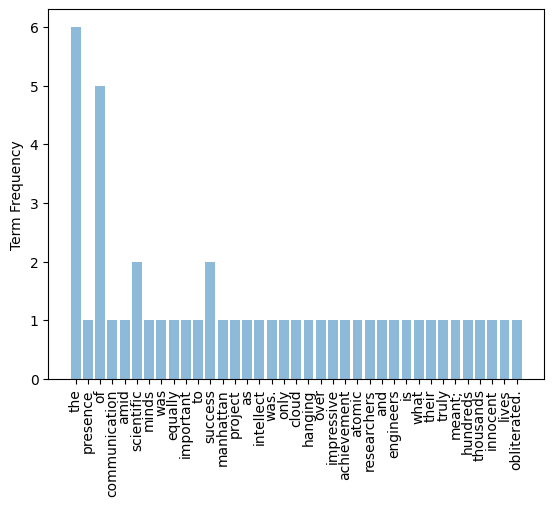

In [41]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
x = np.arange(len(counts))
y = list(counts.values())

plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, list(counts.keys()), rotation='vertical')
plt.ylabel('Term Frequency')
plt.show()

### Exercise #10
Create a bar graph for the TF-IDF values that you computed earlier for the toy collection.

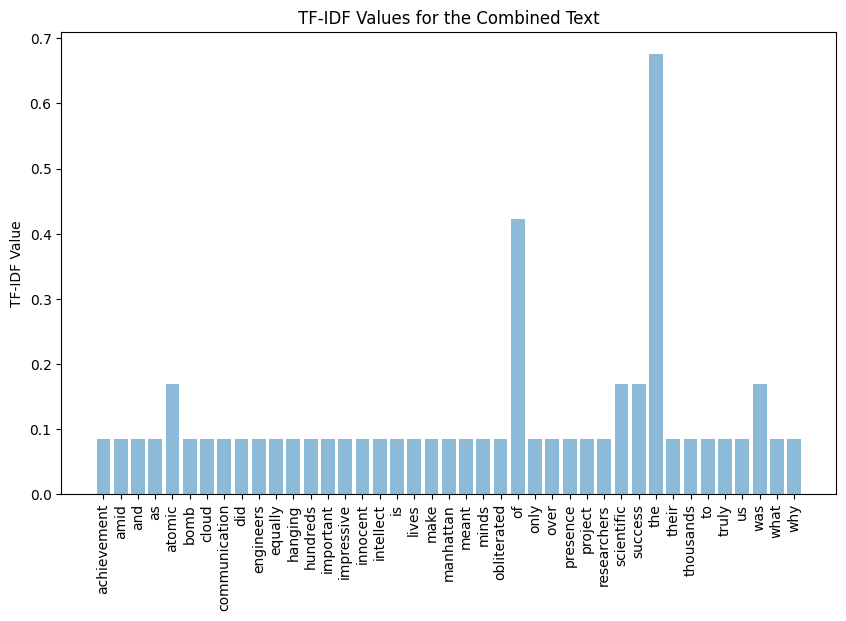

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Compute the TF-IDF of the combined_text
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([combined_text])
feature_names = vectorizer.get_feature_names_out()
tfidf_values = tfidf_matrix.toarray()[0]

# Create a dictionary for easy plotting
tfidf_dict = dict(zip(feature_names, tfidf_values))

# Prepare data for the bar graph
x = np.arange(len(tfidf_dict))
y = list(tfidf_dict.values())

plt.figure(figsize=(10, 6))
plt.bar(x, y, align='center', alpha=0.5)
plt.xticks(x, list(tfidf_dict.keys()), rotation='vertical')
plt.ylabel('TF-IDF Value')
plt.title('TF-IDF Values for the Combined Text')
plt.show()